### Finding Percentiles

We are given an array of $n$ numbers and we want to find the $p$th percential ($0\leq p \leq 1$).

The most direct way is to sort the array and then read the element at location `int(np)`

However sorting requires time $O(n \log n)$ in the worst case. We would like to do better.

Here we show a randomized algorithm whose expected running time, for any sequence, is $O(n)$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def percentile(a,i,debug=False):
    l=a.shape[0] 
    global _sum
    _sum+=l
    if debug:
        print('length=',l, end=', ')
    if l==1:
        return a[0]
    r=randint(l)
    pivot=a[r]
    smaller=a[a<pivot]
    equal=a[a==pivot]
    larger=a[a>pivot]
    if debug:
        print('index=',i,'pivot=',pivot,'smaller=',smaller.shape[0],\
              'equal=',equal.shape[0],'larger=',larger.shape[0],end=' ')

    if len(smaller)>i:
        if debug:
            print('choose smaller')
        return percentile(smaller,i,debug=debug)
    elif len(smaller)+len(equal)>i:
        if debug:
            print('choose equal')
        return equal[0]
    else:
        if debug:
            print('choose larger')
        return percentile(larger,i-len(smaller)-len(equal),debug=debug)

In [21]:
n=100   #size of array
a=randint(int(n/2),size=n) # generte a random arra
a

array([12,  2, 16,  5, 17, 16, 28, 49,  0, 31, 29, 37,  9, 45,  9, 38, 30,
       31, 17, 33, 14,  9,  4, 13, 32, 29,  7, 14,  1, 17,  7, 34,  4, 48,
        7, 13, 24, 26, 41, 41, 37, 10, 44, 43, 36,  7, 47, 33, 16,  9, 29,
       11, 39, 28, 24, 30, 13, 47,  0, 33, 27, 20, 17, 23, 10, 23, 34, 32,
       26, 33, 28, 17, 11, 25, 13, 30, 17, 12, 19, 13, 14, 16, 20,  8, 11,
       26, 30, 21, 45, 36, 11, 17, 16, 11, 12,  1,  6, 10,  1,  6])

In [36]:
p=0.15   # Define the percentile
i=int(p*n)

b=sort(a) # find the percentile by sorting
print('answer=',b[i])

answer= 8


In [44]:
# Find the percentile using our randomized algorithm
global _sum  # variable for computing total run time - sum of lengths
_sum=0
P=percentile(a,i,debug=True)
print('answer=',P,'total steps=',_sum, 'bound on expectation=',8*n)

length= 100, index= 15 pivot= 10 smaller= 20 equal= 3 larger= 77 choose smaller
length= 20, index= 15 pivot= 1 smaller= 2 equal= 3 larger= 15 choose larger
length= 15, index= 10 pivot= 9 smaller= 11 equal= 4 larger= 0 choose smaller
length= 11, index= 10 pivot= 4 smaller= 1 equal= 2 larger= 8 choose larger
length= 8, index= 7 pivot= 6 smaller= 1 equal= 2 larger= 5 choose larger
length= 5, index= 4 pivot= 8 smaller= 4 equal= 1 larger= 0 choose equal
answer= 8 total steps= 159 bound on expectation= 800


### Note
The length of  the array shrinks rapidly. The actual amount varies randomly, but the number of iterations is about $(\log n)$ where $n$ is the length of the sequence,

### Why is the algorithm fast?
The key is that at each level of the recursive call the length of the array shrinks, on average, by a constant factor. This has two effects:
1. The number of levels is $O(\log n)$ 
2. The amound of work that needs to be done at each level is smaller by a factor from the work at the previous level.

Combining these two facts, we get that the expected run time of the algorithm is $O(n)$. Considerably faster than the method based on sorting. 

For a more detailed and rigorous analysis, see the class notes.

## Quicksort

In [6]:
def quicksort(a,level,debug=False):
    l=len(a) 
    global _sum
    _sum+=l
    if l<2:
        return a
    if debug:
        print('level=',level,'length=',l, end=', ')

    r=randint(l)
    pivot=a[r]
    smaller=[]
    equal=[]
    larger=[]
    for i in range(l):
        x=a[i]
        if x<pivot:
            smaller.append(x)
        elif x>pivot:
            larger.append(x)
        else:
            equal.append(x)
            
    if debug:
        print('smaller=',len(smaller),\
              'equal=',len(equal),'larger=',len(larger))

    return quicksort(smaller,level+1,debug=debug)+equal+quicksort(larger,level+1,debug=debug)

In [7]:
global _sum  # variable for computing total run time - sum of lengths
results=[]
for n in [100*2**j for j in list(range(0,11))]:#size of array
    # Find the percentile using our randomized algorithm
    _stat=[]
    for i in range(100): # number of identical runs
        _sum=0
        a=list(permutation(n)) # generte a random array
        s=quicksort(a,0,debug=False)
        _stat.append(_sum)
    _stat[:5]
    results.append((n,mean(_stat),std(_stat)))
    print(n,end=',')

100,200,400,800,1600,3200,6400,12800,25600,51200,102400,

In [8]:
results

[(100, 742.16, 55.68908690219297),
 (200, 1792.75, 120.95539467092817),
 (400, 4116.84, 244.3812071334455),
 (800, 9107.49, 437.0288890908701),
 (1600, 20725.41, 1065.0694352482376),
 (3200, 46016.94, 2178.1983693869574),
 (6400, 99948.36, 3951.378171018309),
 (12800, 217425.42, 7737.862051212855),
 (25600, 472033.45, 15188.692286286532),
 (51200, 1013996.22, 32944.26890327967),
 (102400, 2169563.69, 67250.74959429003)]

### Empirical analysis of quicktime run time

Text(0.5, 1.0, 'runtime vs. n')

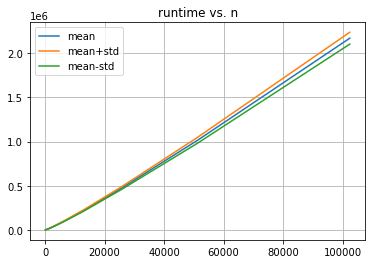

In [9]:
_n=np.array([x[0] for x in results])
_mean=np.array([x[1] for x in results])
_std=np.array([x[2] for x in results])
plot(_n,_mean,label='mean')
plot(_n,_mean+_std,label='mean+std')
plot(_n,_mean-_std,label='mean-std')
grid()
legend()
title('runtime vs. n')

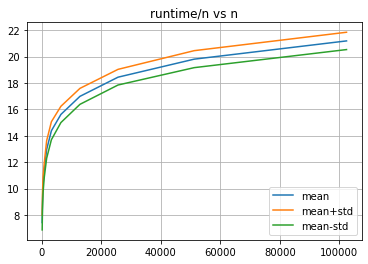

In [10]:
plot(_n,_mean/_n,label='mean')
plot(_n,(_mean+_std)/_n,label='mean+std')
plot(_n,(_mean-_std)/_n,label='mean-std')
grid()
legend()
title('runtime/n vs n');

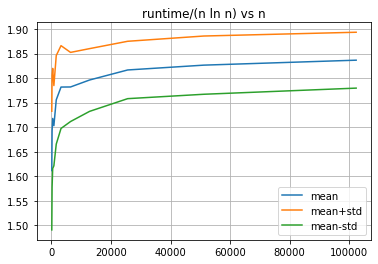

In [11]:
plot(_n,_mean/(_n*log(_n)),label='mean')
plot(_n,(_mean+_std)/(_n*log(_n)),label='mean+std')
plot(_n,(_mean-_std)/(_n*log(_n)),label='mean-std')
grid()
legend()
title('runtime/(n ln n) vs n');

## Conclusions from empirical analysis

We see that, for the range $1 \leq n \leq 100000$ the run time is $T(n) \approx c n \ln n$
where $c \in [1.5,2]$

### Homework
Perform a similar analysis for the median finding algorithm, includng finding the coefficient $c$.